In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "random_walk"
    cd(joinpath(@__DIR__, "../../../../MorphoMolMonteCarlo/"))
    Pkg.activate("Project.toml")
end

using MorphoMol

using CairoMakie
using LinearAlgebra
using Random
using Rotations
using StaticArrays

  Activating project at `~/Doktor/Code/MorphoMolMonteCarlo`


In [2]:
# v = direction of maximum energy
# w = template orientation
function rotating_needle_energy(x, v, w)
    v ⋅ (exp(Rotations.RotationVecGenerator(x...)) * w)
end

rotating_needle_energy (generic function with 1 method)

In [3]:
T = 0.25
β = 1.0 / T

σ = 0.5

v = [1.0, 0.0, 0.0] # direction of maximum energy
w = [1.0, 0.0, 0.0] # initial state

energy(x) = rotating_needle_energy(x, v, w)
perturbation(x) = x .+ randn(3) * σ

rwm = MorphoMol.Algorithms.RandomWalkMetropolis(energy, perturbation, β)
x = rand(3) .* pi
iterations = 100000
output = MorphoMol.Algorithms.SimulationStates(
    Vector{Float64}([]),
    Vector{Float64}([])
)
output = MorphoMol.Algorithms.simulate!(rwm, output, x, iterations);

state_coordinates = [exp(Rotations.RotationVecGenerator(x...)) * w for x in output.states]
xs = [c[1] for c in state_coordinates]
ys = [c[2] for c in state_coordinates]
zs = [c[3] for c in state_coordinates];
output.αs[end]

0.71433f0

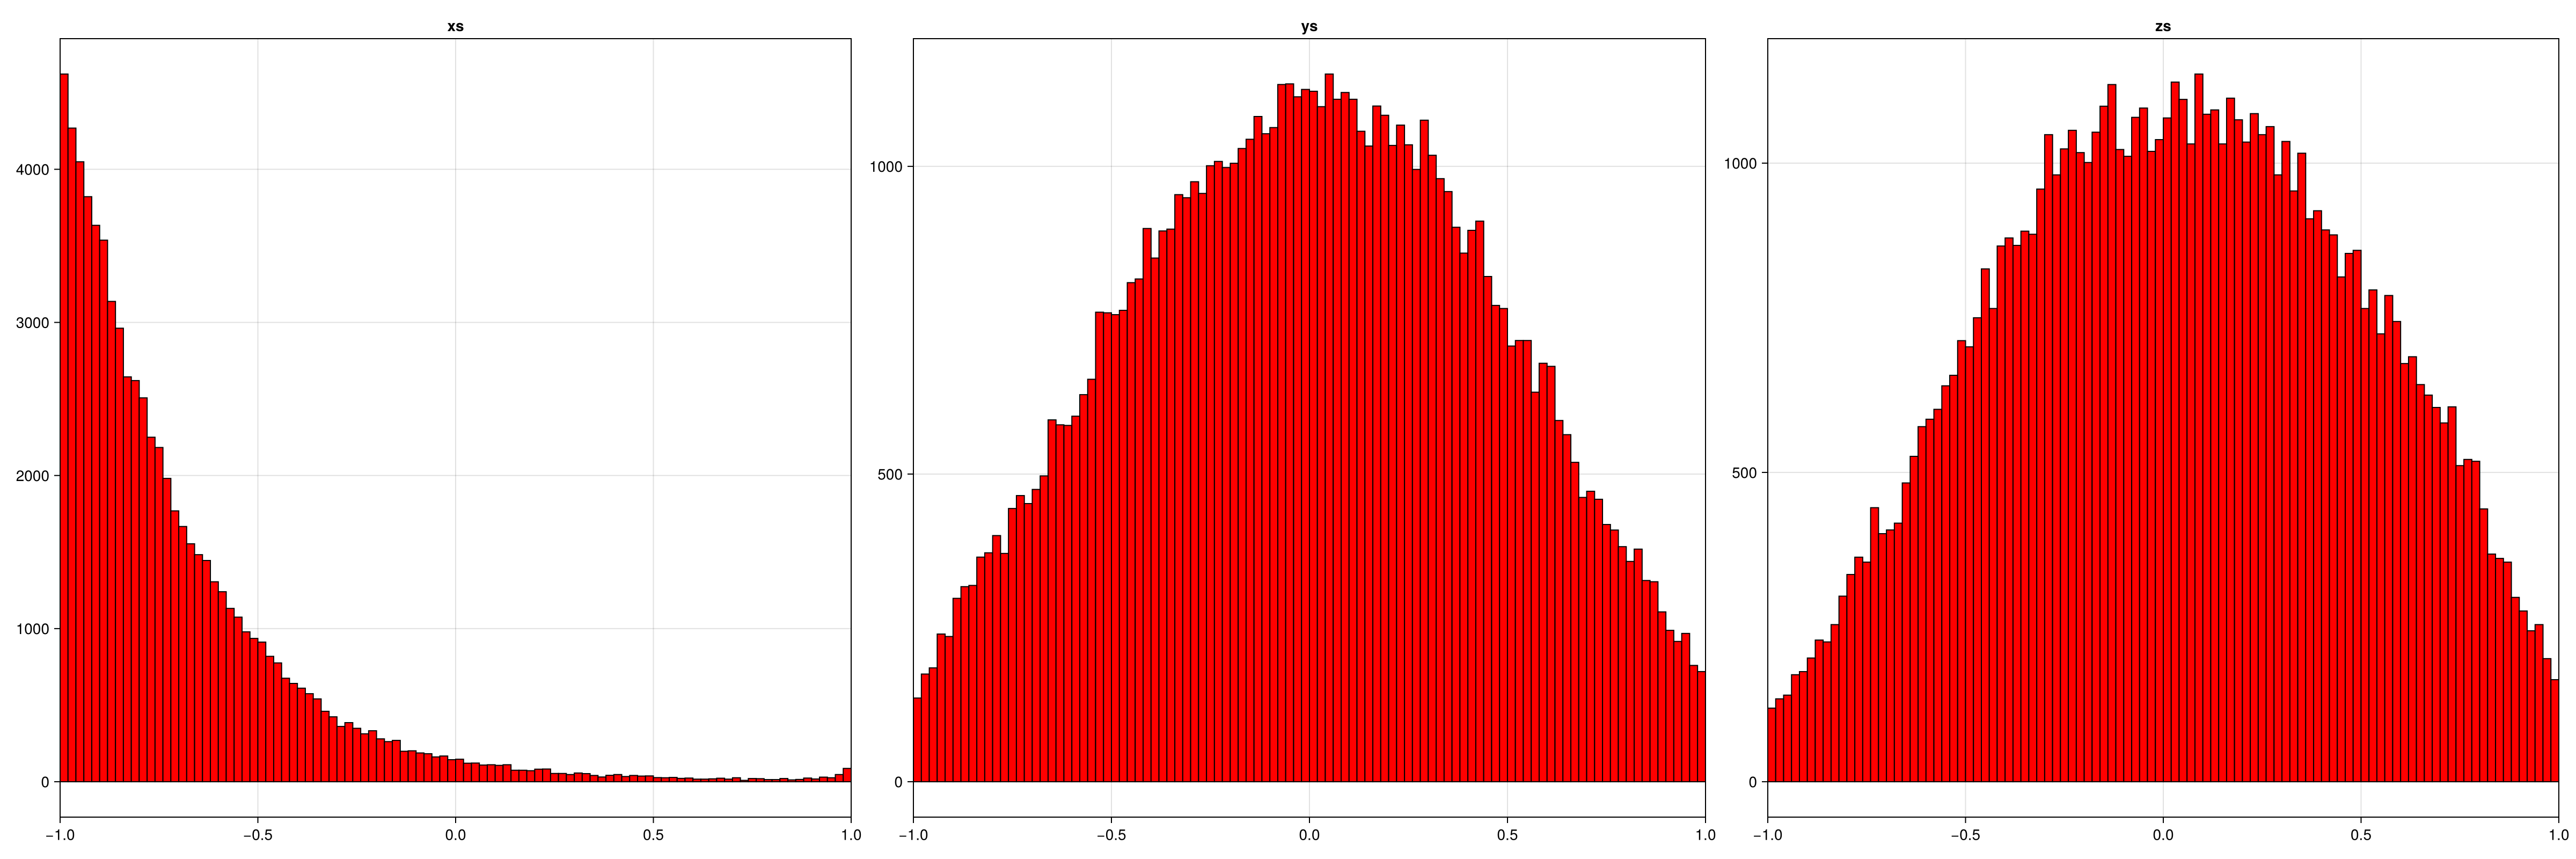

In [4]:
f = Figure(size = (2400, 800))
bin_number = 100
hist(f[1, 1], xs, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "xs", limits = ((-1.0, 1.0), nothing),))
hist(f[1, 2], ys, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "ys", limits = ((-1.0, 1.0), nothing),))
hist(f[1, 3], zs, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "zs", limits = ((-1.0, 1.0), nothing),))
f